In [1]:
#!pip install wordcloud
#!pip install torchvision
#!pip install transformers
#!pip install ipywidgets
#!pip install Keras-Preprocessing

# **Import python libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.cuda.amp import autocast
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [ ]:
Sentiment_Analysis_train_dataset = pd.read_csv("/content/train.csv", encoding="ISO-8859-1")
Sentiment_Analysis_test_dataset = pd.read_csv("/content/test.csv", encoding="ISO-8859-1")

# **Display the first 5 rows**

In [ ]:
print("\nSentiment_Analysis_train_dataset:")
Sentiment_Analysis_train_dataset.head()


Sentiment_Analysis_train_dataset:


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
print("\nSentiment_Analysis_test_dataset:")
Sentiment_Analysis_test_dataset.head()


Sentiment_Analysis_test_dataset:


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


# **EDA**

## **Inspect the dataset**

In [ ]:
print("\nSentiment_Analysis_train_dataset:")
Sentiment_Analysis_train_dataset.info()


Sentiment_Analysis_train_dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
print("\nSentiment_Analysis_test_dataset:")
Sentiment_Analysis_test_dataset.info()


Sentiment_Analysis_test_dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


## **Find Null Values**

In [ ]:
print("\nSentiment_Analysis_train_dataset:")
Sentiment_Analysis_train_dataset.isnull().sum()


Sentiment_Analysis_train_dataset:


,0
textID,0
text,1
selected_text,1
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
print("\nSentiment_Analysis_test_dataset:")
Sentiment_Analysis_test_dataset.isnull().sum()


Sentiment_Analysis_test_dataset:


,0
textID,1281
text,1281
sentiment,1281
Time of Tweet,1281
Age of User,1281
Country,1281
Population -2020,1281
Land Area (Km²),1281
Density (P/Km²),1281


## **Remove null values**

In [ ]:
print("\nSentiment_Analysis_train_dataset:")
Sentiment_Analysis_train_dataset.dropna(inplace=True)
Sentiment_Analysis_train_dataset.isnull().sum()


Sentiment_Analysis_train_dataset:


,0
textID,0
text,0
selected_text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
print("\nSentiment_Analysis_test_dataset:")
Sentiment_Analysis_test_dataset.dropna(inplace=True)
Sentiment_Analysis_test_dataset.isnull().sum()


Sentiment_Analysis_test_dataset:


,0
textID,0
text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


## **Check for duplicate values**

In [ ]:
duplicates = Sentiment_Analysis_train_dataset.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(Sentiment_Analysis_train_dataset[duplicates])

Number of duplicate rows: 0


In [ ]:
duplicates = Sentiment_Analysis_test_dataset.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(Sentiment_Analysis_test_dataset[duplicates])

Number of duplicate rows: 0


## **Data Shape**

In [ ]:
print("Sentiment_Analysis_train_dataset Shape:", Sentiment_Analysis_train_dataset.shape)
print("Sentiment_Analysis_test_dataset Shape:", Sentiment_Analysis_test_dataset.shape)

Sentiment_Analysis_train_dataset Shape: (27480, 10)
Sentiment_Analysis_test_dataset Shape: (3534, 9)


## **Summary Statistics**

In [ ]:
print("\nSentiment_Analysis_train_dataset:")
Sentiment_Analysis_train_dataset.describe()


Sentiment_Analysis_train_dataset:


,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748000e+04,2.748000e+04,27480.000000
mean,4.018634e+07,6.621672e+05,357.699491
std,1.504972e+08,1.807457e+06,2013.786207
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [ ]:
print("\nSentiment_Analysis_test_dataset:")
Sentiment_Analysis_test_dataset .describe()


Sentiment_Analysis_test_dataset:


,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


## **Visualization**

### **Visualization 1: Distribution of Sentiment in the Training Dataset**

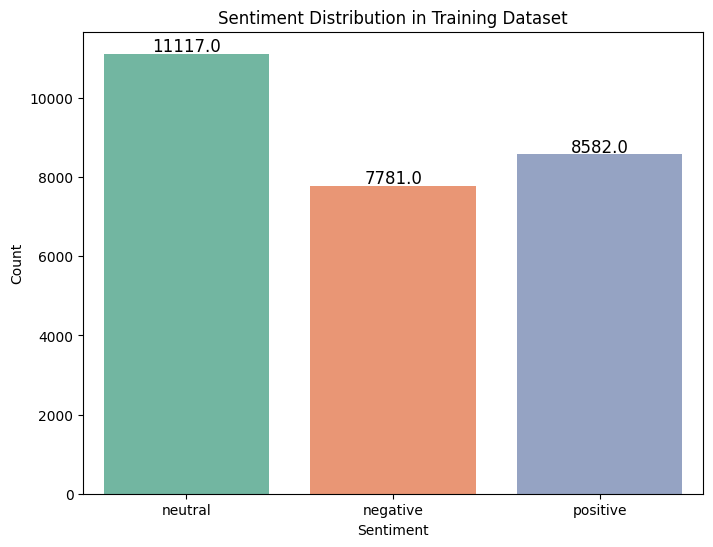

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sentiment', data=Sentiment_Analysis_train_dataset, palette='Set2')
plt.title('Sentiment Distribution in Training Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()

### **Visualization 2: Sentiment Distribution by Country**

<Figure size 1200x800 with 0 Axes>

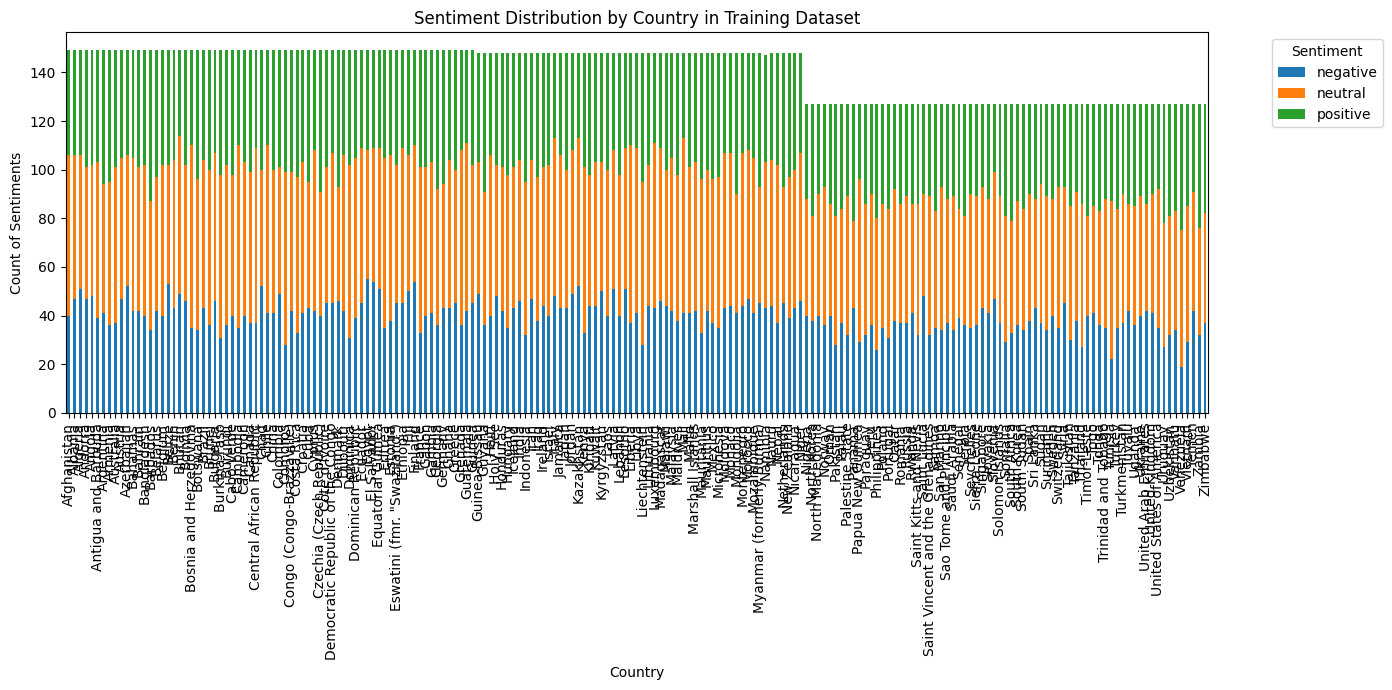

In [ ]:
plt.figure(figsize=(12, 8))
country_sentiment = Sentiment_Analysis_train_dataset.groupby('Country')['sentiment'].value_counts().unstack().fillna(0)
country_sentiment.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Sentiment Distribution by Country in Training Dataset')
plt.xlabel('Country')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=90)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Visualization 3: Distribution of Tweet Times in the Training Dataset**

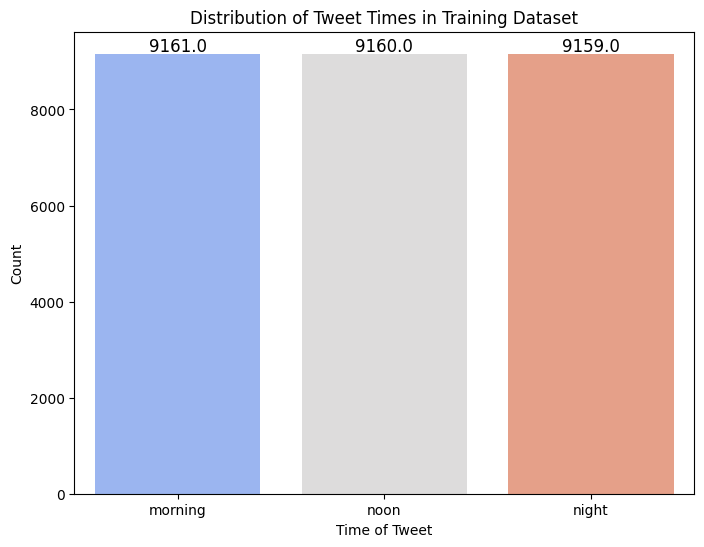

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Time of Tweet', data=Sentiment_Analysis_train_dataset, palette='coolwarm')
plt.title('Distribution of Tweet Times in Training Dataset')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()

### **Visualization 4: Population Distribution Across Sentiments in the Training Dataset**

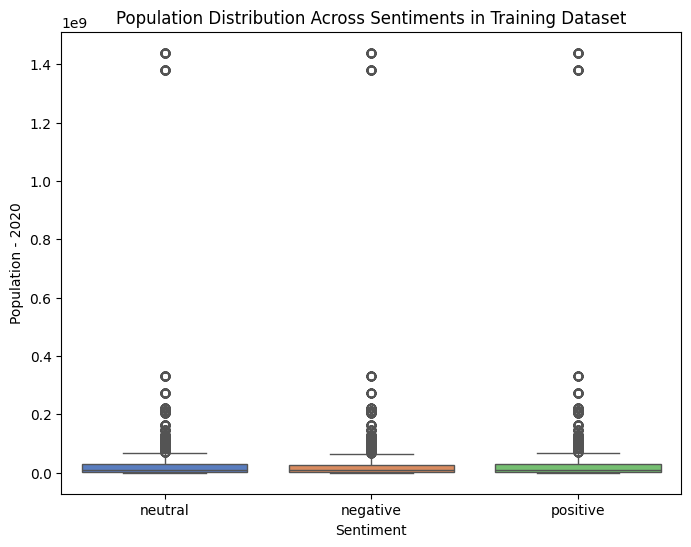

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='Population -2020', data=Sentiment_Analysis_train_dataset, palette='muted')
plt.title('Population Distribution Across Sentiments in Training Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Population - 2020')
plt.show()

# **Data Pee-Procesing**

## **Download NLTK resources (stopwords and punkt for tokenization)**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## **Data Preprocessing Function using NLTK**

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english') and word.isalpha()]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

## **Preprocess the text data in both train and test datasets**

In [ ]:
Sentiment_Analysis_train_dataset['processed_text'] = Sentiment_Analysis_train_dataset['text'].apply(preprocess_text)
Sentiment_Analysis_test_dataset['processed_text'] = Sentiment_Analysis_test_dataset['text'].apply(preprocess_text)

## **TF-IDF: Convert text data into TF-IDF features**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can change max_features based on your needs
X_train_tfidf = tfidf_vectorizer.fit_transform(Sentiment_Analysis_train_dataset['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(Sentiment_Analysis_test_dataset['processed_text'])
print("\nTF-IDF Features shape:")
print(X_train_tfidf.shape)


TF-IDF Features shape:
(27480, 1000)


## **WordCloud: Visualize the most frequent words in the training dataset's processed text**

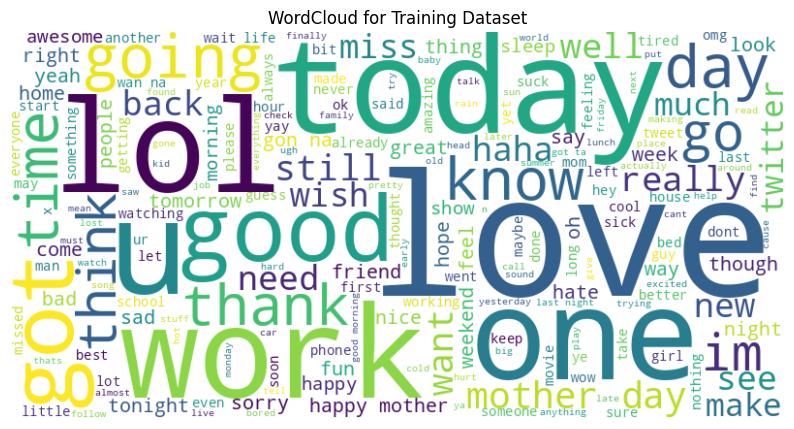

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(Sentiment_Analysis_train_dataset['processed_text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Training Dataset')
plt.show()

## **WordCloud for Sentiment-wise Most Frequent Words**

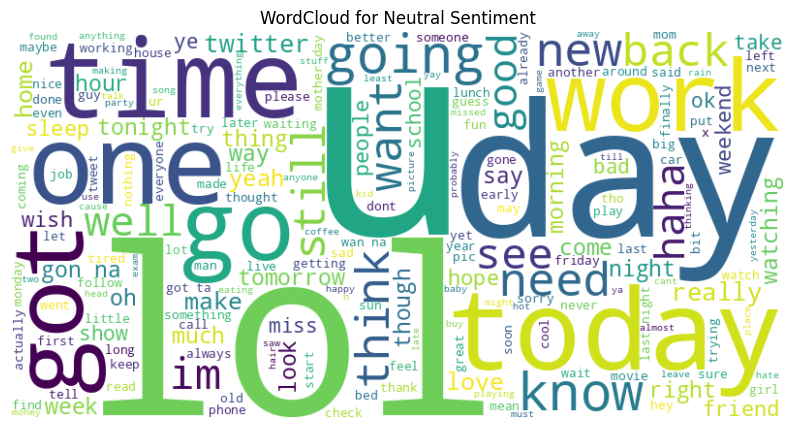

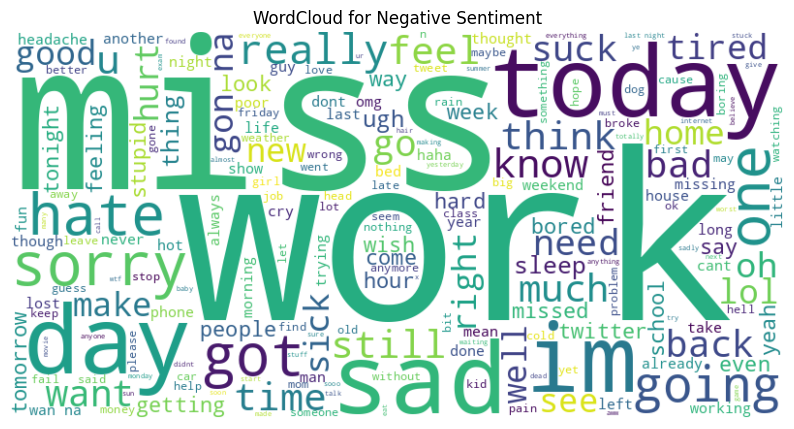

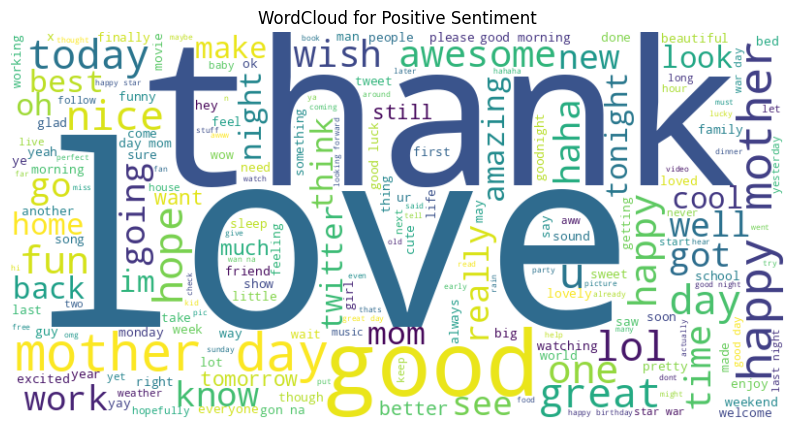

In [ ]:
sentiments = Sentiment_Analysis_train_dataset['sentiment'].unique()
for sentiment in sentiments:
    sentiment_text = ' '.join(Sentiment_Analysis_train_dataset[Sentiment_Analysis_train_dataset['sentiment'] == sentiment]['processed_text'])
    sentiment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(sentiment_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment.capitalize()} Sentiment')
    plt.show()

# **Model Development**

## **Pre-process the text data for both BERT and LSTM**

In [ ]:
def preprocess_for_bert(text):
    return text.lower()

Sentiment_Analysis_train_dataset['processed_text'] = Sentiment_Analysis_train_dataset['text'].apply(preprocess_for_bert)
Sentiment_Analysis_test_dataset['processed_text'] = Sentiment_Analysis_test_dataset['text'].apply(preprocess_for_bert)

## **Encode the labels as integers for both models**

In [ ]:
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
Sentiment_Analysis_train_dataset['label'] = Sentiment_Analysis_train_dataset['sentiment'].map(label_map)
Sentiment_Analysis_test_dataset['label'] = Sentiment_Analysis_test_dataset['sentiment'].map(label_map)

## **BERT Model Preparation**

### **Load BERT tokenizer and encode the dataset**

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_bert(texts, max_len=256):
    return tokenizer(texts, padding=True, truncation=True, max_length=max_len, return_tensors='pt')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### **Encode the training and test datasets for BERT**

In [ ]:
train_encodings = encode_bert(Sentiment_Analysis_train_dataset['processed_text'].tolist())
test_encodings = encode_bert(Sentiment_Analysis_test_dataset['processed_text'].tolist())

### **BERT Model**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3).to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### **Prepare data loaders**

In [ ]:
train_labels = torch.tensor(Sentiment_Analysis_train_dataset['label'].values).to(device)
test_labels = torch.tensor(Sentiment_Analysis_test_dataset['label'].values).to(device)

### **Set up the optimizer and loss function**

In [ ]:
optimizer = AdamW(bert_model.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

### **Train the BERT model**

In [ ]:
def train_bert(model, train_data, train_labels, optimizer, loss_fn, batch_size=8, epochs=3):
    model.train()
    # Create DataLoader for batching
    dataset = TensorDataset(train_data['input_ids'], train_data['attention_mask'], train_labels)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        total_loss = 0
        for batch in dataloader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]

            optimizer.zero_grad()

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}")

### **Evaluate the BERT model**

In [ ]:
def evaluate_bert_with_mixed_precision(model, test_data, test_labels, batch_size=8):
    model.eval()
    dataset = TensorDataset(test_data['input_ids'], test_data['attention_mask'], test_labels)
    dataloader = DataLoader(dataset, batch_size=batch_size)

    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]

            with autocast():  # Enable mixed precision
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                predictions = torch.argmax(outputs.logits, dim=1)

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy
bert_accuracy = evaluate_bert_with_mixed_precision(bert_model, test_encodings, test_labels, batch_size=8)
print(f"BERT Model Accuracy: {bert_accuracy * 100:.2f}%")

BERT Model Accuracy: 40.46%


## **LSTM Model Preparation**

### **Pad the sequences for LSTM**

In [ ]:
max_len = 256
X_train = Sentiment_Analysis_train_dataset['processed_text'].values
X_test = Sentiment_Analysis_test_dataset['processed_text'].values

### **Tokenize the text data for LSTM**

In [ ]:
tokenizer_lstm = Tokenizer()
tokenizer_lstm.fit_on_texts(X_train)

X_train_seq = tokenizer_lstm.texts_to_sequences(X_train)
X_test_seq = tokenizer_lstm.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

### **LSTM Model**

In [ ]:
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer_lstm.word_index) + 1, output_dim=100, input_length=max_len),
    LSTM(100, return_sequences=False),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: negative, neutral, positive
])

lstm_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **Train the LSTM model**

In [ ]:
lstm_model.fit(X_train_pad, Sentiment_Analysis_train_dataset['label'], epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.4023 - loss: 1.0874 - val_accuracy: 0.4247 - val_loss: 1.0822
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.4028 - loss: 1.0876 - val_accuracy: 0.4247 - val_loss: 1.0830
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4008 - loss: 1.0881 - val_accuracy: 0.4247 - val_loss: 1.0824
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3992 - loss: 1.0889 - val_accuracy: 0.4247 - val_loss: 1.0836
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4077 - loss: 1.0863 - val_accuracy: 0.4247 - val_loss: 1.0832
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3981 - loss: 1.0890 - val_accuracy: 0.4247 - val_loss: 1.0819
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4041 - loss: 1.0867 - val_accuracy: 0.4247 - val_loss: 1.0822
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3952 - loss: 1.0896 - val_a

### **Evaluate the LSTM model**

In [ ]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_pad, Sentiment_Analysis_test_dataset['label'])
print(f"LSTM Model Accuracy: {lstm_accuracy * 100:.2f}%")

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4050 - loss: 1.0867
LSTM Model Accuracy: 40.46%
